We know the following, from the competition descrition.

**VARIABLE DESCRIPTIONS**:

- survival: Survival
    (0 = No; 1 = Yes)
- pclass: Passenger Class
    (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked: Port of Embarkation
     (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES**:

- Pclass is a proxy for socio-economic status (SES) -  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. `sibsp` and `parch`)
some relations were ignored.  The following are the definitions used
for `sibsp` and `parch`.

  - Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
  - Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
  - Parent:   Mother or Father of Passenger Aboard Titanic
  - Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore `parch=0` for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [68]:
import pandas as pd
import numpy as np

test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')

In [69]:
import sklearn.linear_model as linear_model

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In order to easily generate the CSV submission file when it is time to do so, we define the function below.

In [71]:
def csv_from_prediction(prediction, filename='submission.csv'):
    submission = pd.DataFrame(data={'PassengerId': test['PassengerId'], 'Survived': prediction.astype(int)})

    # This is what we do if we don't use 'index=False' below
    #submission.set_index('PassengerId', drop=True, inplace=True)
    submission.to_csv(filename, index=False)

csv_from_prediction(test['Sex'] == 'female')

In [72]:
#Women and Children First
def model_1(data):
    return (data['Age'] <= 11) | (data['Sex'] == 'female')

len(train[train['Survived'] == model_1(train)]) / len(train)

0.7912457912457912

In [73]:
csv_from_prediction(model_1(test))

# Feature engineering (and cleaning of data)

Some transformations should really be applied to both the training and the test set as, for instance, families might be split in both sets and a mother would be travelling with a child (but an isolated set wouldn't be telling that story).

A different matter is using entries for both to train the models: one is about getting an accurate view of the passengers, the other about fitting based on the test.

Another way of looking at this is that the training and test sets would be part of the main test anyway. It just so happens that the test set is kept as private to Kaggle for the sake of the competition, but in other scenarios it would be fully available (and with results, to allow for scoring) since the beginning.

Age is not always available, and it is intuitively important. We need to infer it somehow, or assign a sensible default.

In [74]:
train[~train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


Filling in `Age` as the median of known ages and manipulating mathematically `Age` and `Pclass` just to see if I get better results. 

In [75]:
import re

embarked_mapping = { 'Q' : 1, 'C' : 2, 'S' : 3} # Southampton -> Cherbourg -> Queenstown (integer represents "time on board")

ticket_sizes = (train['Ticket'].append(test['Ticket'])).value_counts()

title_mapping = (train['Name'].append(test['Name'])).apply(lambda x: re.match('.*,([^\.]+)\..*', x)[1].strip())
title_mapping = np.unique(title_mapping)  # An Array
title_mapping = {v: k for k, v in enumerate(title_mapping)}  # A Dict
title_mapping['Mme'] = title_mapping['Mrs']
title_mapping['Mlle'] = title_mapping['Miss']
title_mapping['the Countess'] = title_mapping['Lady']
title_mapping['Don'] = title_mapping['Mr']
title_mapping['Dona'] = title_mapping['Mrs']
inverse_title_mapping = {v: k for k, v in title_mapping.items()}  # The inverse Dict
        
def munge(d):
    data = d.copy()
    # Mapping sex to numeric data.
    data.loc[data['Sex'] == 'female', 'Sex'] = 1
    data.loc[data['Sex'] == 'male', 'Sex'] = 0

    # Add a field to summarize the size of the group, based on the Ticket number.
    data['GroupSize'] = data['Ticket'].apply(lambda x: ticket_sizes[x])
    
    # Mapping where the passenger embarked to numeric data.
    data['Embarked'] = data['Embarked'].fillna('S')
    data['Embarked'].apply(lambda x: embarked_mapping[x] if x in embarked_mapping else x)
    
    # Extraction of Title from `Name`
    data['Title'] = data['Name'].apply(lambda x: re.match('.*,([^\.]+)\..*', x)[1].strip())
    data['Title'] = data['Title'].apply(lambda x: title_mapping[x] if x in title_mapping else x)
    data['Fare'] = data['Fare'].fillna(0)

    # Doubtful approach
    #  data['Age'] = data['Age'].fillna(data['Age'].median())
    # A better one does this per title, but we want to use the full set (it applies to the full set)
    # So, that will be after the first 'munging'

    # Surprisingly (to me), modifying the range of some features by squaring or taking the root, changes results
    # I guess it makes the distribution more linear
    data['Pclass2'] = np.square(data['Pclass'])
    
    data['NameLength'] = data['Name'].apply(lambda x: len(x))
    return data

train_set = munge(train)
test_set = munge(test)

median_age_mapping = {}
for title in inverse_title_mapping:
    median_age_mapping[title] = (train_set.loc[train_set['Title'] == title, 'Age'].append(test_set.loc[test_set['Title'] == title, 'Age']).median())

def munge_age(data):
    for title in inverse_title_mapping:
        data.loc[(data['Title'] == title) & data['Age'].isnull(), 'Age'] = median_age_mapping[title]

    # Surprisingly (to me), modifying the range of some features by squaring or taking the root, changes results
    # I guess it makes the distribution more linear
    data['Age2'] = np.sqrt(data['Age'])
    
    data['Kid'] = np.zeros(len(data), dtype=int)
    data.loc[data['Title'] == title_mapping['Master'], 'Kid'] = 1
    data.loc[data['Title'] == title_mapping['Miss'], 'Kid'] = 1

    return data
    
train_set = munge_age(train_set)
test_set = munge_age(test_set)

def munge_mum(data):
    data['MumKid'] = np.zeros(len(data), dtype=int)
    data.loc[(data['Parch'] == 1) & (data['GroupSize'] == 3) & (data['Sex'] == 1) & (data['Kid'] == 0), 'MumKid'] = 1
    return data

train_set = munge_mum(train_set)
test_set = munge_mum(test_set)

In [76]:
train_set.loc[train_set['Title'] == 15, 'Age']

149    42.0
150    51.0
249    54.0
626    57.0
848    28.0
886    27.0
Name: Age, dtype: float64

(array([ 549.,  342.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

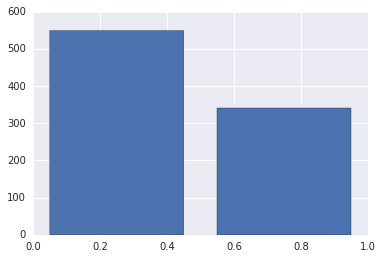

In [77]:
plt.hist(train_set['Survived'], bins=2, histtype='bar', rwidth=0.8)

In [78]:
test_set[test_set['Title']==3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GroupSize,Title,Pclass2,NameLength,Age2,Kid,MumKid


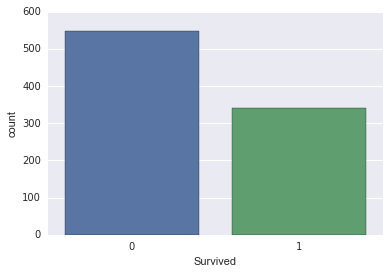

In [79]:
import seaborn as sns
sns.countplot(train_set['Survived'])

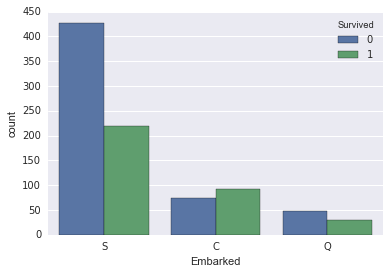

In [80]:
sns.countplot(train_set['Embarked'], hue=train_set['Survived'])

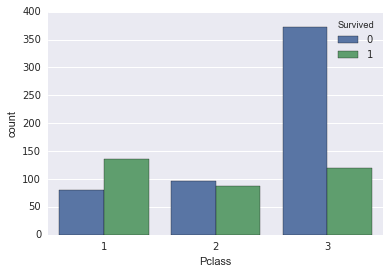

In [81]:
sns.countplot(train_set['Pclass'], hue=train_set['Survived'])

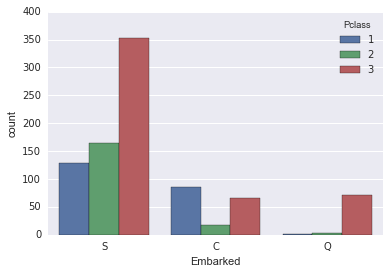

In [82]:
sns.countplot(train_set['Embarked'], hue=train_set['Pclass'])

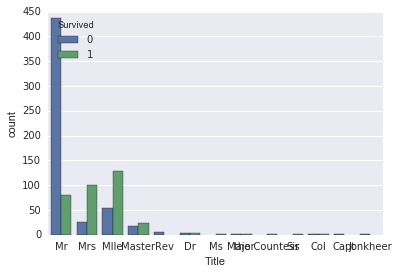

In [83]:
sns.countplot(train_set['Title'].apply(lambda x: inverse_title_mapping[x] if x in inverse_title_mapping else x), hue=train_set['Survived'])

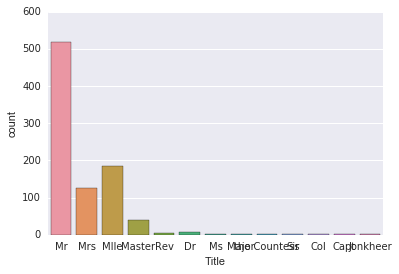

In [84]:
sns.countplot(train_set['Title'].apply(lambda x: inverse_title_mapping[x] if x in inverse_title_mapping else x) )

We added a field to summarize the size of the group, based on the Ticket number.
So, this would be a family travelling together

In [85]:
train_set[(train_set['GroupSize'] == 3) & ((train_set['Title'] == title_mapping['Master']) | (train_set['Title'] == title_mapping['Miss']))].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GroupSize,Title,Pclass2,NameLength,Age2,Kid,MumKid
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.00,1,1,PP 9549,16.7000,G6,S,3,9,9,31,2.000000,1,0
65,66,1,3,"Moubarek, Master. Gerios",0,4.00,1,1,2661,15.2458,NaN,C,3,8,9,24,2.000000,1,0
78,79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,NaN,S,3,8,4,29,0.911043,1,0


In [86]:
# Then the mum
train_set[(train_set['GroupSize'] == 3) & (train_set['Title'] == title_mapping['Mrs'])].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GroupSize,Title,Pclass2,NameLength,Age2,Kid,MumKid
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,3,13,9,49,5.196152,0,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,35.5,1,0,PC 17569,146.5208,B78,C,3,13,1,46,5.958188,0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,C,3,13,1,40,7.000000,0,0


In [87]:
# Then the mum
train_set[(train_set['GroupSize'] == 3)][['Name', 'Age', 'Survived', 'Pclass', 'Parch']]

,Name,Age,Survived,Pclass,Parch
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00,1,3,2
10,"Sandstrom, Miss. Marguerite Rut",4.00,1,3,1
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",35.50,1,1,0
48,"Samaan, Mr. Youssef",29.00,0,3,0
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.00,1,1,0
65,"Moubarek, Master. Gerios",4.00,1,3,1
78,"Caldwell, Master. Alden Gates",0.83,1,2,2
109,"Moran, Miss. Bertha",22.00,1,3,0
118,"Baxter, Mr. Quigg Edmond",24.00,0,1,1
128,"Peter, Miss. Anna",22.00,1,3,1


In [88]:
model1 = linear_model.LinearRegression()

In [89]:
target = train_set['Survived']
sex_age = train_set[['Sex', 'Age2', 'Pclass2']]
model1.fit(X=sex_age , y=target )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
prediction = model1.predict(sex_age)
prediction[model1.predict(sex_age) > .5] = 1
prediction[model1.predict(sex_age) <= .5] = 0

In [91]:
((prediction - target) != 0).value_counts(normalize=True)

False    0.802469
True     0.197531
Name: Survived, dtype: float64

Make it into a function like before:

In [92]:
def model_linear_1_features(data, feature_list):
    target = data['Survived'] if 'Survived' in data.columns.values else None
    features = data[feature_list]
    return features, target

def model_linear_1(data, feature_list):
    features, target = model_linear_1_features(data, feature_list)
    model = linear_model.LinearRegression()
    model.fit(X=features , y=target )
    return model

def model_linear_1_fit(data, model, feature_list):
    features, target = model_linear_1_features(data, feature_list)
    prediction = model.predict(features)
    prediction[prediction > .5] = 1
    prediction[prediction <= .5] = 0  
    return prediction

In [93]:
features = ['Sex', 'Age2', 'GroupSize', 'Pclass']
model = model_linear_1(train_set, features)
prediction = model_linear_1_fit(train_set, model, features)
((prediction - target) != 0).value_counts(normalize=True)

False    0.804714
True     0.195286
Name: Survived, dtype: float64

In [94]:
prediction = model_linear_1_fit(test_set, model, features)
csv_from_prediction(prediction, filename='submission_group_class.csv')

With Sex/Age2/Pclass2 it was a worse prediction than the already submitted: `0.75598`.

Let's give a last try to a linear regression and then get on with a decision tree thingy.

In [95]:
model2 = linear_model.Lasso(0.07)

In [96]:
most_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'GroupSize']
model2.fit(X=train_set[most_features], y=target)
model2.coef_

array([-0.03854481,  0.19379207, -0.00315275, -0.        , -0.        ,
        0.00187928, -0.        ])

In [97]:
prediction = model2.predict(train_set[most_features])
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
((prediction - target) != 0).value_counts(normalize=True)

False    0.744108
True     0.255892
Name: Survived, dtype: float64

In [98]:
import sklearn.tree as tree
model3 = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)

In [99]:
model3.fit(X=train_set[most_features], y=target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [130]:
model3.feature_importances_

array([ 0.12300649,  0.49113312,  0.1193452 ,  0.06470687,  0.        ,
        0.15396445,  0.04784387])

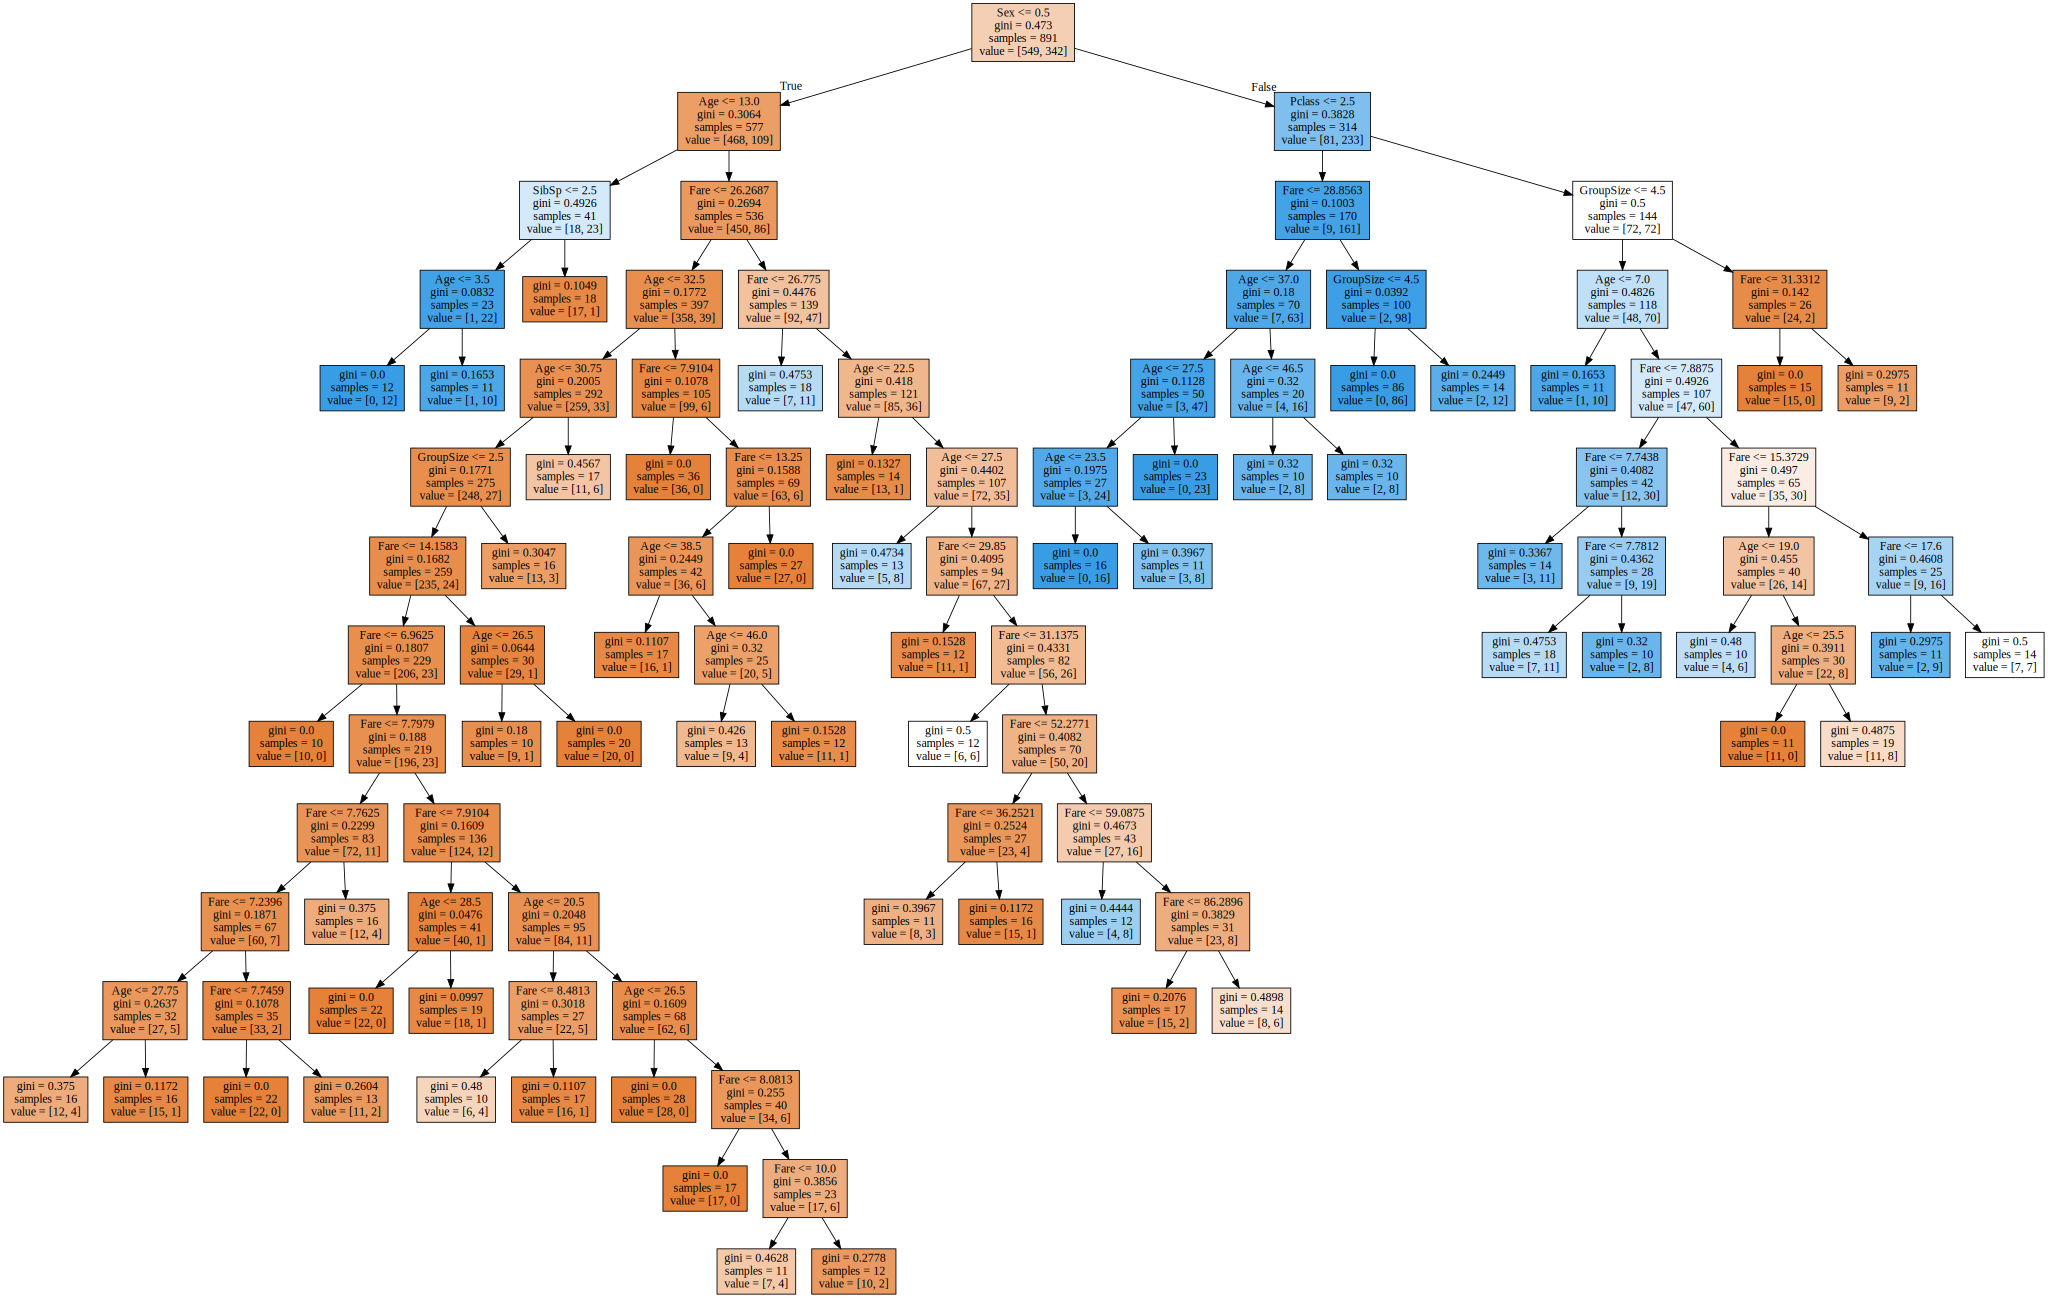

In [101]:
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(model3, out_file=None, feature_names=most_features, filled=True)
graphviz.Source(tree_dot, format="png")

In [102]:
prediction = model3.predict(test_set[most_features])
csv_from_prediction(prediction, filename='submission_decision_tree_bigger_leaves.csv')

# Try a decission tree with way more features

In [103]:
source = train_set.drop(['Survived', 'Name', 'Ticket', 'Pclass2', 'Age2', 'PassengerId', 'Cabin'], axis=1)

In [104]:
source = pd.get_dummies(source)

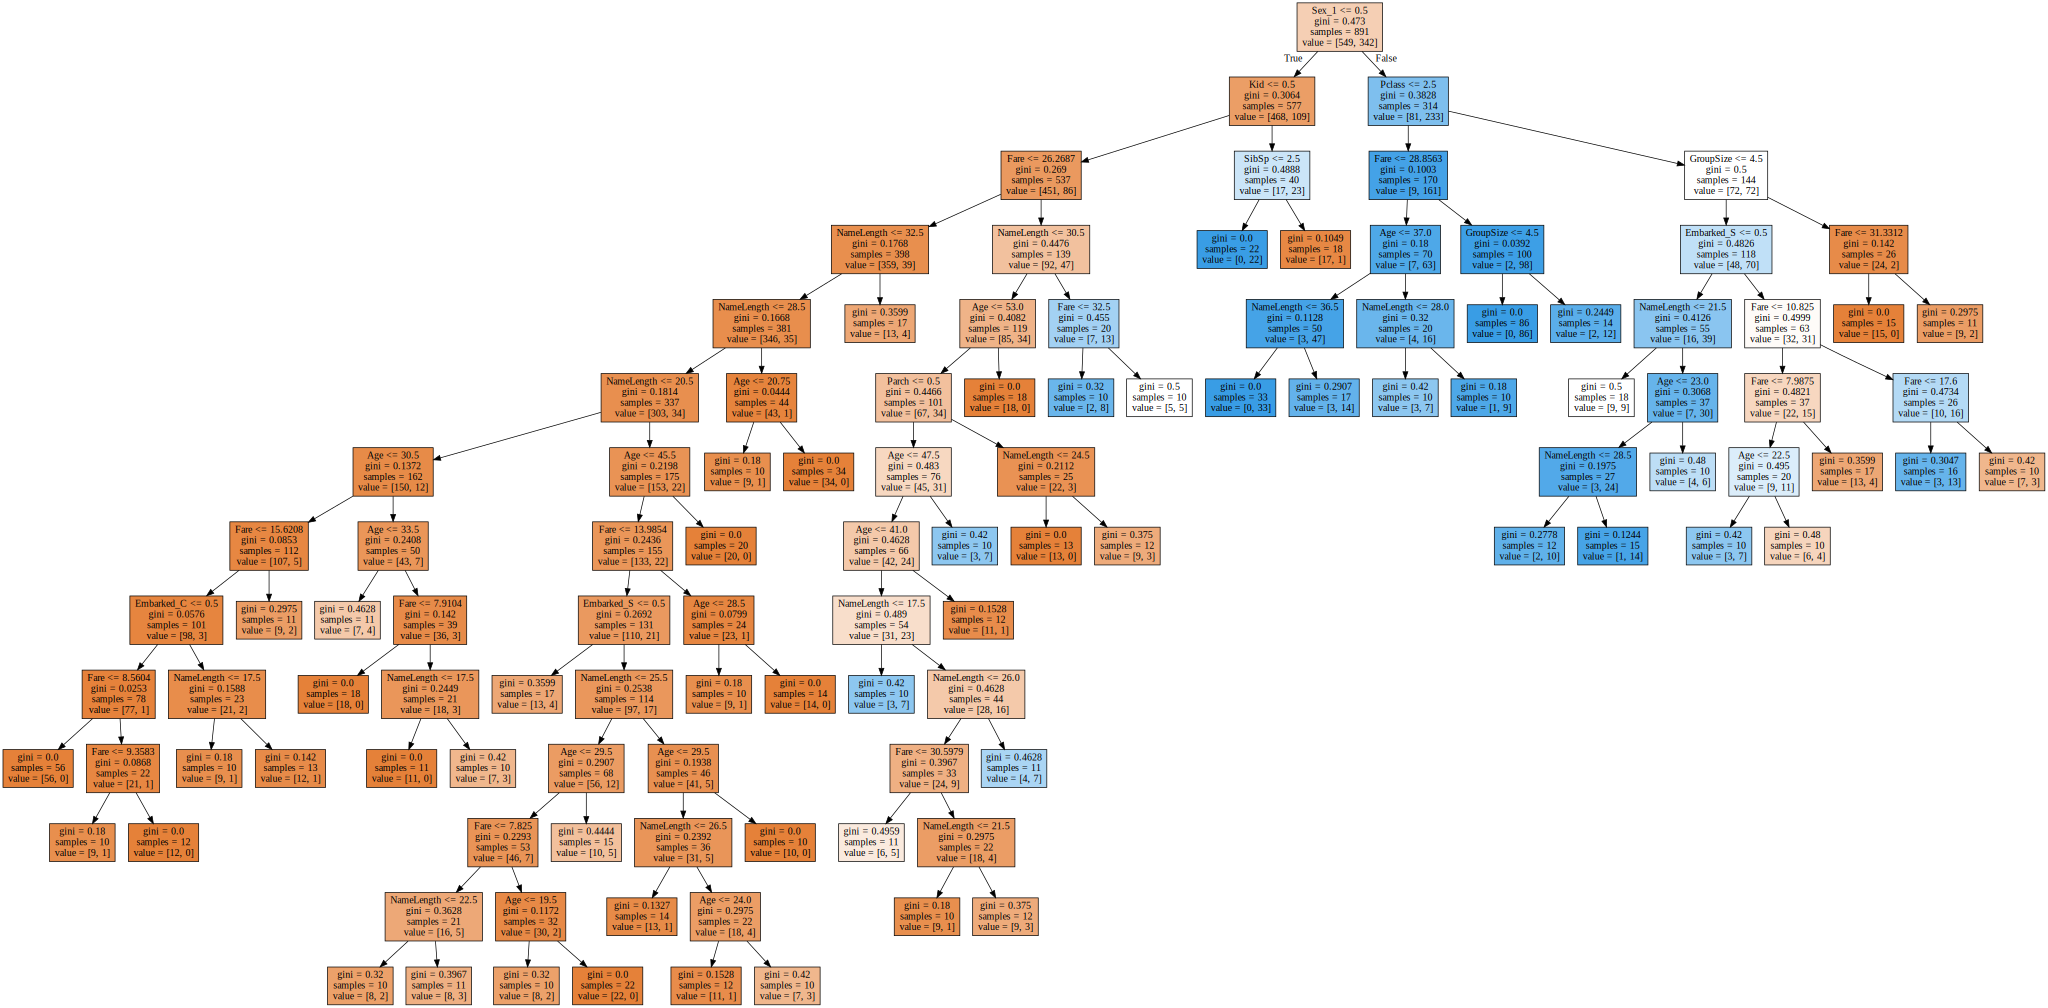

In [105]:
model_all = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
model_all.fit(X=source, y=target)
tree_dot = export_graphviz(model_all, out_file=None, feature_names=source.columns.values, filled=True)
graphviz.Source(tree_dot, format="png")

In [106]:
prediction = model_all.predict(source)
((prediction - target) != 0).value_counts(normalize=True)

False    0.872054
True     0.127946
Name: Survived, dtype: float64

In [107]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {'min_samples_leaf': np.arange(1, 20),
              'min_samples_split' : np.arange(2, 20)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid.fit(source, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [108]:
print("score of {} for {}".format(grid.best_score_, grid.best_params_))

score of 0.8181818181818182 for {'min_samples_leaf': 2, 'min_samples_split': 19}


In [109]:
source

,Pclass,Age,SibSp,Parch,Fare,GroupSize,Title,NameLength,Kid,MumKid,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,12,23,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,2,13,51,0,0,0,1,1,0,0
2,3,26.0,0,0,7.9250,1,9,22,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,2,13,44,0,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,1,12,24,0,0,1,0,0,0,1
5,3,29.0,0,0,8.4583,1,12,16,0,0,1,0,0,1,0
6,1,54.0,0,0,51.8625,2,12,23,0,0,1,0,0,0,1
7,3,2.0,3,1,21.0750,5,8,30,1,0,1,0,0,0,1
8,3,27.0,0,2,11.1333,3,13,49,0,0,0,1,0,0,1
9,2,14.0,1,0,30.0708,2,13,35,0,0,0,1,1,0,0


Now, let's refit

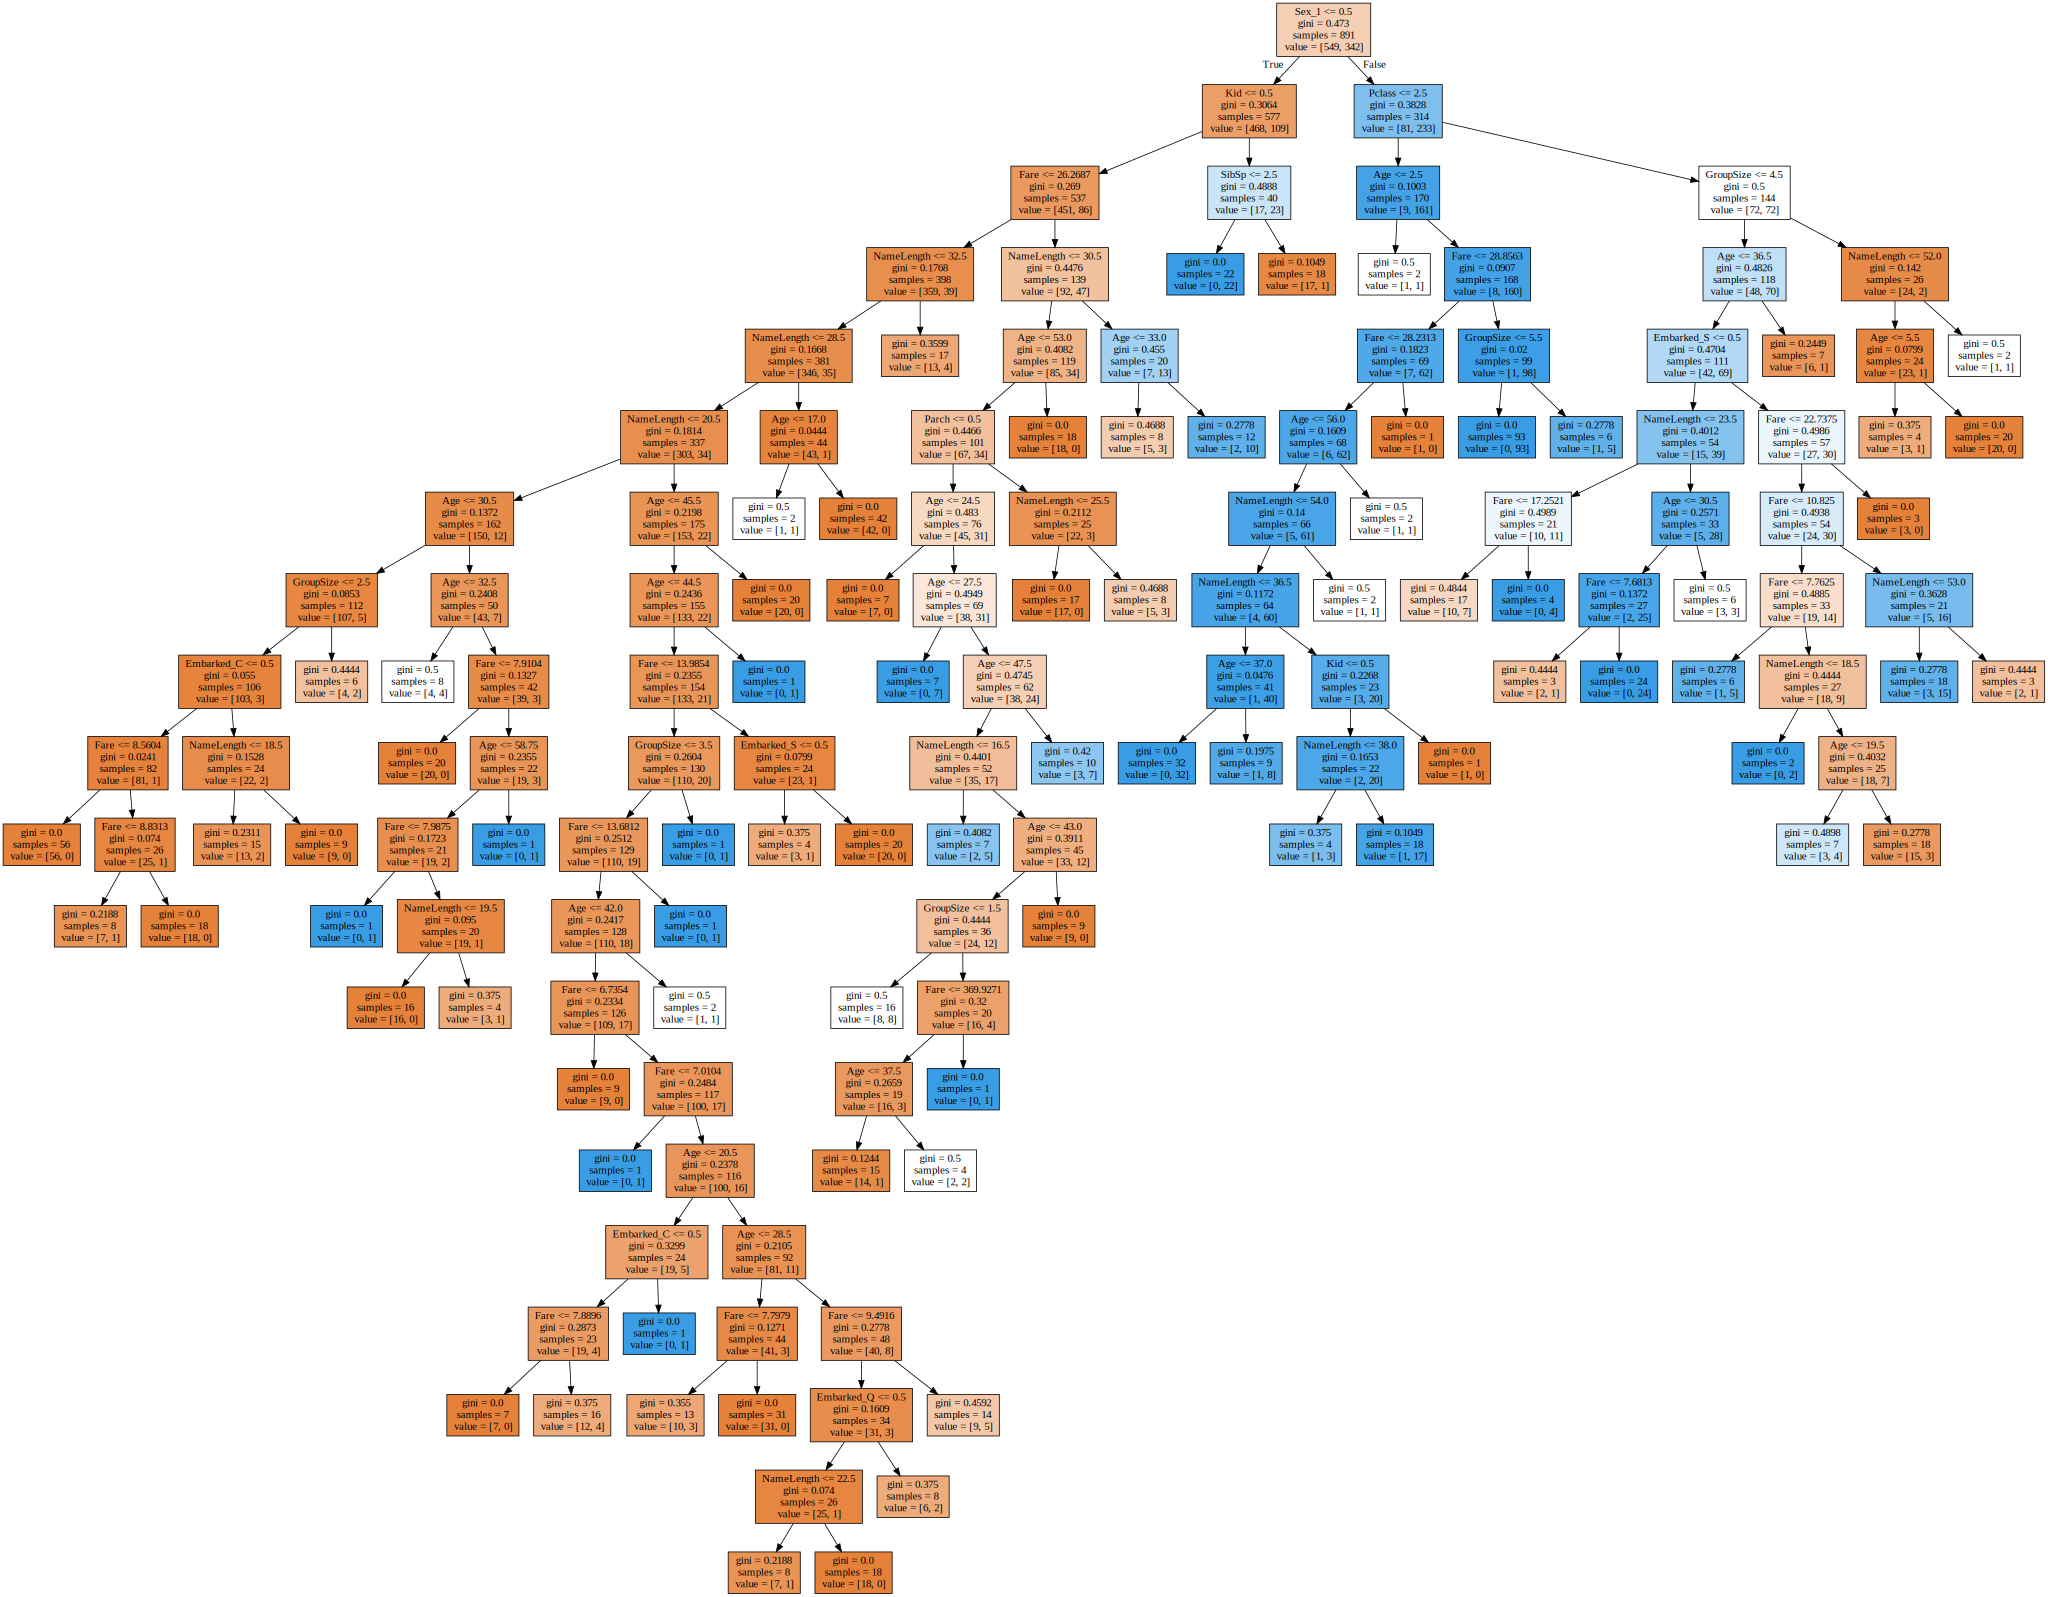

In [110]:
model_all = tree.DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=19)
model_all.fit(X=source, y=target)
tree_dot = export_graphviz(model_all, out_file=None, feature_names=source.columns.values, filled=True)
graphviz.Source(tree_dot, format="png")

In [111]:
prediction = model_all.predict(source)
((prediction - target) != 0).value_counts(normalize=True)

False    0.900112
True     0.099888
Name: Survived, dtype: float64

In [112]:
source_test = test_set.drop(['Name', 'Ticket', 'Pclass2', 'Age2', 'PassengerId', 'Cabin'], axis=1)
source_test=pd.get_dummies(source_test)
source_test
prediction = model_all.predict(source_test)
csv_from_prediction(prediction, filename='submission_decision_tree_dummified.csv')

#This is worse

# Go back to the same tests as before the course

In [113]:
# Let's use a K-Fold cross validator to assess parameters of our models
import sklearn.model_selection as model_selection
kfold = model_selection.KFold(n_splits=3)

In [114]:
results = {}
for leaf_size in range(1,20):
    for split_size in range(2,40):
        model_dec_tree = tree.DecisionTreeClassifier(min_samples_leaf=leaf_size, min_samples_split=split_size)
        score = model_selection.cross_val_score(model_dec_tree, X=train_set[most_features], y=target, cv=kfold)
        #print("[{2}, {3}] {0} => {1}".format(score.mean(), score, leaf_size, split_size))
        results["{0},{1}".format(leaf_size, split_size)] = score.mean()

In [115]:
# Best setup
pd.Series(results).argmax()

'10,11'

In [116]:
most_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'GroupSize']

chosen_model_decission_tree = tree.DecisionTreeClassifier(min_samples_leaf=7, min_samples_split=19)
chosen_model_decission_tree.fit(X=train_set[most_features], y=target)
prediction = chosen_model_decission_tree.predict(test_set[most_features])
csv_from_prediction(prediction, filename='submission_decision_7_19.csv')

In [117]:
print(chosen_model_decission_tree.feature_importances_)
print(chosen_model_decission_tree.score(X=train_set[most_features], y=target))

[ 0.119513    0.47443725  0.12726128  0.06250719  0.          0.16049539
  0.0557859 ]
0.867564534231


In [118]:
pd.Series(chosen_model_decission_tree.feature_importances_, index= most_features)

Pclass       0.119513
Sex          0.474437
Age          0.127261
SibSp        0.062507
Parch        0.000000
Fare         0.160495
GroupSize    0.055786
dtype: float64

In [119]:
model_lasso = linear_model.Lasso(0.07)
score = model_selection.cross_val_score(model_lasso, X=train_set[most_features], y=target, cv=kfold)
print("{0} => {1}".format(score.mean(), score))

0.22898858523784024 => [ 0.20133608  0.2156536   0.26997608]


In [120]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y
class ModelTNA1(BaseEstimator, ClassifierMixin):
    def model_linear_1_features(data, feature_list):
        target = data['Survived'] if 'Survived' in data.columns.values else None
        features = data[feature_list]
        return features, target
    
    def model_linear_1(data, feature_list):
        features, target = model_linear_1_features(data, feature_list)
        model = linear_model.LinearRegression()
        model.fit(X=features , y=target )
        return model
    
    def model_linear_1_fit(data, model, feature_list):
        features, target = model_linear_1_features(data, feature_list)
        prediction = model.predict(features)
        prediction[prediction > .5] = 1
        prediction[prediction <= .5] = 0  
        return prediction

    # Try to create a 'standard' estimator
    #def get_params(deep=False):
    #    return None
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_, y = np.unique(y, return_inverse=True)
        #self.X_ = X
        #self.y_ = y
        self.model_ = linear_model.LinearRegression()
        self.model_.fit(X, y)
        return self

    def predict(self, X):
        prediction = self.model_.predict(X)
        if type(self.classes_[0]) == np.str_:
            class_prediction = np.empty(prediction.shape, dtype=object)
        else:
            class_prediction = np.empty(prediction.shape)

        if len(self.classes_) == 1:
            class_prediction.fill(self.classes_[0])
        else:
            class_prediction[prediction <= 1/len(self.classes_)] = self.classes_[0]
            class_prediction[prediction > 1/len(self.classes_)] = self.classes_[1]
        return class_prediction

from sklearn.utils.estimator_checks import check_estimator
#check_estimator(ModelTNA1)  # Should pass, but it has issues with strings as classes

In [121]:
class ModelTNA(BaseEstimator, ClassifierMixin):
    def __init__(self, features_list):
        self.features_list = features_list
    
    def fit(self, X, y):
        X, y = check_X_y(X[self.features_list], y)
        self.classes_, y = np.unique(y, return_inverse=True)
        #self.X_ = X
        #self.y_ = y
        self.model_ = linear_model.LinearRegression()
        self.model_.fit(X, y)
        return self

    def predict(self, X):
        prediction = self.model_.predict(X[self.features_list])
        if type(self.classes_[0]) == np.str_:
            class_prediction = np.empty(prediction.shape, dtype=object)
        else:
            class_prediction = np.empty(prediction.shape)

        if len(self.classes_) == 1:
            class_prediction.fill(self.classes_[0])
        else:
            class_prediction[prediction <= 1/len(self.classes_)] = self.classes_[0]
            class_prediction[prediction > 1/len(self.classes_)] = self.classes_[1]
        return class_prediction

In [122]:
model_tna = ModelTNA1()
score = model_selection.cross_val_score(model_tna, X=train_set[most_features], y=target, cv=kfold)
print("{0} => {1}".format(score.mean(), score))

0.7856341189674523 => [ 0.78114478  0.78787879  0.78787879]


In [123]:
most_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'GroupSize', 'Title']

results = []
algs = []

algs.append(linear_model.Lasso(0.07))
algs.append(ModelTNA(['Age']))
algs.append(ModelTNA(['Age', 'Pclass']))

import sklearn.ensemble as ensemble

for leaf_size in range(1,20):
    for split_size in range(2,40):
        model_dec_tree = tree.DecisionTreeClassifier(min_samples_leaf=leaf_size, min_samples_split=split_size)
        algs.append(model_dec_tree)

i = 0
for alg in algs:
    i += 1
    if i % 10 == 0:
        print(".", end='')
    score = model_selection.cross_val_score(alg, X=train_set[most_features], y=target, cv=kfold)
    #print("[{2}, {3}] {0} => {1}".format(score.mean(), score, leaf_size, split_size))
    results.append(score.mean())

........................................................................

In [124]:
best_test_score_id = pd.Series(results).argmax()
print(best_test_score_id)
print(results[best_test_score_id])
print(algs[best_test_score_id])

249
0.830527497194
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [125]:
model = algs[best_test_score_id].fit(X=train_set[most_features], y=target)
prediction = model.predict(test_set[most_features])
csv_from_prediction(prediction, filename='submission_cross_val_best_2.csv')

In [126]:
most_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'MumKid', 'GroupSize', 'NameLength', 'Title']

results = []
algs = []

for leaf_size in range(1,20):
    for split_size in range(2,40):
        model_random = ensemble.RandomForestClassifier(n_estimators=20,min_samples_leaf=leaf_size, min_samples_split=split_size)
        algs.append(model_random)

i = 0
for alg in algs:
    i += 1
    if i % 10 == 0:
        print(".", end='')
    score = model_selection.cross_val_score(alg, X=train_set[most_features], y=target, cv=kfold)
    #print("[{2}, {3}] {0} => {1}".format(score.mean(), score, leaf_size, split_size))
    results.append(score.mean())

best_test_score_id = pd.Series(results).argmax()
print(best_test_score_id)
print(results[best_test_score_id])
print(algs[best_test_score_id])

........................................................................50
0.840628507295
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=14, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [127]:
model = algs[best_test_score_id].fit(X=train_set[most_features], y=target)
prediction = model.predict(test_set[most_features])
csv_from_prediction(prediction, filename='submission_cross_val_best_3.csv')

In [128]:
a=algs[best_test_score_id]

In [129]:
print(a.feature_importances_)
print(most_features)

[ 0.09425383  0.24518747  0.10227401  0.04535387  0.0144381   0.14809001
  0.00073501  0.07060398  0.12000985  0.15905387]
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'MumKid', 'GroupSize', 'NameLength', 'Title']
